<a href="https://colab.research.google.com/github/kgazaleh/thwnd_2000-IDS/blob/main/problem2_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use the following nutrition dataset: https://github.com/bforoura/IDS/blob/main/HW4/nutrition_subset.csv

In [ ]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
#Let's read in the data file
%%R

library(readr)
nutrition <- read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/nutrition_subset.csv", show_col_types = FALSE)
nutrition

# A tibble: 961 × 4
   `food item`                         weight_in_grams saturated_fat cholesterol
   <chr>                                         <dbl>         <dbl>       <dbl>
 1 GELATIN; DRY                  1 EN…             7             0             0
 2 SEAWEED; SPIRULINA; DRIED     1 OZ             28.4           0.8           0
 3 YEAST; BAKERS; DRY; ACTIVE    1 PKG             7             0             0
 4 PARMESAN CHEESE; GRATED       1 OZ             28.4           5.4          22
 5 PARMESAN CHEESE; GRATED       1 CUP           100            19.1          79
 6 PARMESAN CHEESE; GRATED       1 TB…             5             1             4
 7 YEAST; BREWERS; DRY           1 TB…             8             0             0
 8 LAMB;CHOPS;ARM;BRAISED;LEAN   1.7 …            48             2.9          59
 9 TUNA; CANND; DRND;WATR; WHITE 3 OZ             85             0.3          48
10 NONFAT DRY MILK; INSTANTIZED  1 CUP            68             0.3          12
# … with

The elements in the data set are food items of various sizes, ranging from a teaspoon of cinnamon to an entire carrot cake.


Sort the data set by saturated_ fat and produce a listing of the five food items highest in saturated fat. Comment on the validity of comparing food items of different sizes.


In [ ]:
#Sort the data set by saturated_fat and produce a listing of the five food items highest in saturated fat
%%R

head(nutrition[order(nutrition$saturated_fat, 
                    decreasing = TRUE),
                ], 5)

# A tibble: 5 × 4
  `food item`                          weight_in_grams saturated_fat cholesterol
  <chr>                                          <dbl>         <dbl>       <dbl>
1 CHEESECAKE                    1 CAKE            1110         120.         2053
2 ICE CREAM; VANLLA; RICH 16% FT1/2 G…            1188         118.          703
3 YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE            1108          92           609
4 CREME PIE                     1 PIE              910          90.1          46
5 LARD                          1 CUP              205          80.4         195


Food items of larger size are likely to have more saturated fat than smaller food items, so it would make more sense to compare items by saturated fat per gram.

Create a new variable, saturated_ fat_ per_gram, by dividing the amount of saturated fat  by the weight in grams. Sort the data set by saturated_ fat_ per_gram and produce a listing of the five food  items highest in saturated fat per gram. Which food has the most saturated fat per gram?


In [ ]:
#Create new variable saturated_fat_per_gram
%%R

n <- dim(nutrition)
saturated_fat_per_gram = c(nutrition$saturated_fat / nutrition$weight_in_grams)

nutrition <- cbind(nutrition, saturated_fat_per_gram)

head(nutrition)

                               food item weight_in_grams saturated_fat
1 GELATIN; DRY                  1 ENVELP            7.00           0.0
2     SEAWEED; SPIRULINA; DRIED     1 OZ           28.35           0.8
3    YEAST; BAKERS; DRY; ACTIVE    1 PKG            7.00           0.0
4     PARMESAN CHEESE; GRATED       1 OZ           28.35           5.4
5    PARMESAN CHEESE; GRATED       1 CUP          100.00          19.1
6   PARMESAN CHEESE; GRATED       1 TBSP            5.00           1.0
  cholesterol saturated_fat_per_gram
1           0             0.00000000
2           0             0.02821869
3           0             0.00000000
4          22             0.19047619
5          79             0.19100000
6           4             0.20000000


In [ ]:
#Sort data by saturated_fat_per_gram and produce list of 5 food items highest in saturated fat per gram
%%R

head(nutrition[order(nutrition$saturated_fat_per_gram, 
                    decreasing = TRUE),
                ], 5)

                                food item weight_in_grams saturated_fat
909  BUTTER; SALTED                1 TBSP              14           7.1
910  BUTTER; UNSALTED              1 TBSP              14           7.1
710 BUTTER; SALTED                1/2 CUP             113          57.1
711 BUTTER; UNSALTED              1/2 CUP             113          57.1
913   BUTTER; SALTED                1 PAT               5           2.5
    cholesterol saturated_fat_per_gram
909          31              0.5071429
910          31              0.5071429
710         247              0.5053097
711         247              0.5053097
913          11              0.5000000


Butter has the highest saturated fat per gram.

Standardize (zero mean) the field saturated_ fat_ per_gram, and produce a listing of all the food items that are outliers at the high end of the scale. How many food items are outliers at the low end of the scale? Create a density plot for saturated_ fat_ per_gram


In [ ]:
#Standardize saturated_fat_per_gram
%%R
nutrition$scaled_fat <- scale(x = nutrition$saturated_fat_per_gram)

summary(nutrition$scaled_fat)

       V1         
 Min.   :-0.5620  
 1st Qu.:-0.5620  
 Median :-0.4411  
 Mean   : 0.0000  
 3rd Qu.: 0.1539  
 Max.   : 7.1068  


In [ ]:
#Produce a listing of all the food items that are outliers at the high end of the scale
%%R
#Use three sigma rule

three_sigma_rule_high <- (nutrition$scaled_fat > 3 )

cat("The scaled saturated fat per gram values that are high outliers: \n\n")
nutrition$scaled_fat[which(three_sigma_rule_high)]

The scaled saturated fat per gram values that are high outliers: 

 [1] 4.238469 3.936637 4.202078 3.940837 7.079055 7.079055 5.368580 3.276520
 [9] 5.370282 3.222049 7.106775 7.106775 6.998763 6.998763 4.730522


In [ ]:
#How many food items are outliers at the low end of the scale
%%R

three_sigma_rule_low <- (nutrition$scaled_fat < 3 )

cat ("There are", sum(three_sigma_rule_low), "outliers \n\n")

There are 946 outliers 



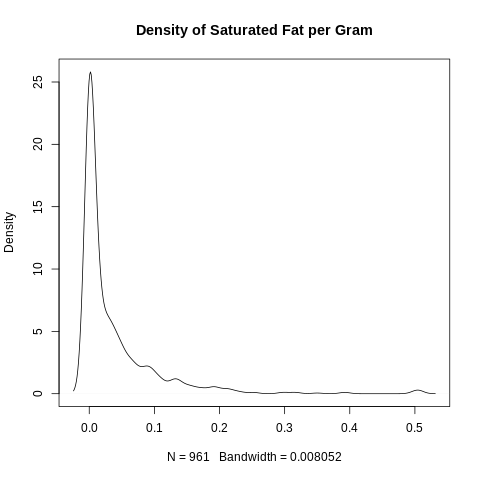

In [ ]:
#Density plot
%%R

d1 <- density(nutrition$saturated_fat_per_gram) 

# plots the results
plot(d1, main="Density of Saturated Fat per Gram") 

Are there any missing values? If so, impute as necessary and explain your approach. 


In [ ]:
#Are there any mising values?
%%R
sum(is.na(nutrition))

[1] 0


Standardize (zero mean) the numeric variables, and determine if there are any outliers. 


In [ ]:
#Standardize weight
%%R

nutrition$scaled_weight <- scale(x = nutrition$weight_in_grams)

summary(nutrition$weight)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.4    32.0   113.0   149.4   218.0  1542.0 


In [ ]:
#Are there any outliers for weight?
%%R
three_sigma_rule <- (nutrition$scaled_weight < -3 | 
                     nutrition$scaled_weight > 3 )

cat ("There are", sum(three_sigma_rule), "outliers \n\n")

There are 22 outliers 



In [ ]:
#Standardize cholesterol
%%R
nutrition$scaled_cholesterol <- scale(x = nutrition$cholesterol)

summary(nutrition$scaled_cholesterol)

       V1         
 Min.   :-0.2714  
 1st Qu.:-0.2714  
 Median :-0.2714  
 Mean   : 0.0000  
 3rd Qu.:-0.1046  
 Max.   :16.8426  


In [ ]:
#Are there any outliers for cholesterol?
%%R
three_sigma_rule <- (nutrition$scaled_cholesterol < -3 | 
                     nutrition$scaled_cholesterol > 3 )

cat ("There are", sum(three_sigma_rule), "outliers \n\n")

There are 17 outliers 



Cheesecake and vanilla ice cream are the food items with the highest saturated fat. There are 946 outliers at the low end of the scale for saturated fat per gram. There are no missing values.